<a href="https://colab.research.google.com/github/wojr21/courses/blob/main/data_science_bootcamp/11_NN_pierwsza_siec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import bibliotek

In [1]:
%tensorflow_version 2.x

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

np.set_printoptions(precision = 12, suppress = True, linewidth = 120)
print(tf.__version__)

2.3.0


### Załadowanie i przygotowanie danych

In [3]:
(X_train, y_train), (X_test, y_test) = load_data()

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [4]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [5]:
print('X_train[0] shape: ', X_train[0].shape)

X_train[0] shape:  (28, 28)


In [6]:
X_train = X_train / 255
X_test = X_test / 255

### Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

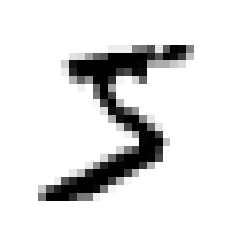

In [7]:
plt.imshow(X_train[0], cmap = 'gray_r')
plt.axis('off')

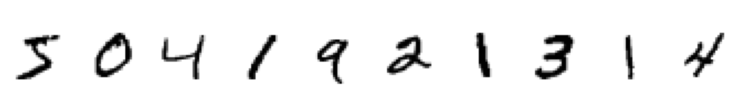

In [8]:
plt.figure(figsize = (13, 13))
for i in range(1, 11):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap = 'gray_r')
  plt.title(y_train[i-1], color = 'white', fontsize = 16)
plt.show()

### Budowa sieci neuronowej

In [9]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Trenowanie modelu

In [10]:
history = model.fit(X_train, y_train, epochs = 5, batch_size = 1)

Epoch 1/5
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2642 - accuracy: 0.9225
Epoch 2/5
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1872 - accuracy: 0.9516
Epoch 3/5
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1724 - accuracy: 0.9572
Epoch 4/5
60000/60000 [==============================] - 76s 1ms/step - loss: 0.1555 - accuracy: 0.9629
Epoch 5/5
60000/60000 [==============================] - 74s 1ms/step - loss: 0.1507 - accuracy: 0.9663


### Ocena modelu

In [11]:
model.evaluate(X_test, y_test, verbose = 2, batch_size = 1)

10000/10000 - 7s - loss: 0.1476 - accuracy: 0.9715


[0.14755135774612427, 0.9714999794960022]

In [12]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.264196,0.922517
1,0.187249,0.951600
2,0.172363,0.957167
3,0.155490,0.962883
4,0.150718,0.966300


In [15]:
fig = make_subplots(rows = 2, cols = 1)
fig.add_trace(go.Scatter(y = metrics['loss'], name = 'loss'), row = 1, col = 1)
fig.add_trace(go.Scatter(y = metrics['accuracy'], name = 'accuracy'), row = 2,
              col = 1)
fig.update_layout(width = 600, height = 400)

### Predykcja na podstawie modelu

In [16]:
model.predict(X_test)

array([[0.            , 0.            , 0.            , ..., 1.            , 0.            , 0.            ],
       [0.            , 0.            , 1.            , ..., 0.            , 0.            , 0.            ],
       [0.            , 1.            , 0.000000000014, ..., 0.00000001284 , 0.000000002765, 0.            ],
       ...,
       [0.            , 0.            , 0.            , ..., 0.000000012607, 0.            , 0.0000000123  ],
       [0.            , 0.            , 0.            , ..., 0.            , 0.            , 0.            ],
       [0.            , 0.            , 0.            , ..., 0.            , 0.            , 0.            ]],
      dtype=float32)

In [17]:
y_pred = model.predict_classes(X_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6])

In [18]:
pred = pd.concat([pd.DataFrame(y_test, columns = ['y_test']),
                  pd.DataFrame(y_pred, columns = ['y_pred'])], axis = 1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [19]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Int64Index([115, 149, 151, 200, 217, 247, 259, 321, 381, 445], dtype='int64')

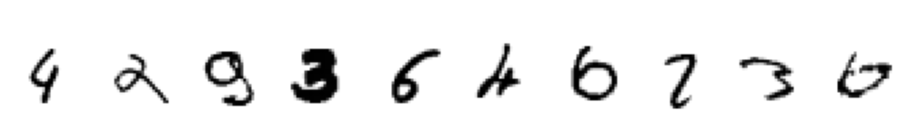

In [21]:
plt.figure(figsize = (16, 16))
for i, j in zip(range(1, 11), misclassified.index[:10]):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_test[j], cmap = 'gray_r')
  plt.title(f'y_test: {y_test[j]}\ny_pred: {y_pred[j]}', color = 'white',
            fontsize = 12)
plt.show()